In [26]:
from bs4 import BeautifulSoup
import requests
import itertools
import re
result = []
for j in range(8):
    url = "https://icook.tw/categories/216?page={}".format(j)
    rescook = requests.get(url)
    soup = BeautifulSoup(rescook.text, "lxml")
    
    for i in range(12):
        text = soup.select('.material')[i].text[3:]
        text = text.split('、')
        text_unpr = []
        for q in text:
            text_unpr.append(re.sub(r'\([^)]*\)|【[^)]*】|［[^)]*］|（[^)]*）| [^)]*','',q))
        result.extend(list(itertools.combinations(text_unpr, 2)))

for j in range(8):
    url = "https://icook.tw/categories/60?page={}".format(j)
    rescook = requests.get(url)
    soup = BeautifulSoup(rescook.text, "lxml")
    
    for i in range(12):
        text = soup.select('.material')[i].text[3:]
        text = text.split('、')
        text_unpr = []
        for q in text:
            text_unpr.append(re.sub(r'\([^)]*\)|【[^)]*】|［[^)]*］|（[^)]*）| [^)]*','',q))
        result.extend(list(itertools.combinations(text_unpr, 2)))
print('Number of total pairs:', len(result))
print('Some examples:', result[:6])

Number of total pairs: 7690
Some examples: [('苜蓿芽', '番茄丁'), ('苜蓿芽', '牛頭牌咖哩炒醬'), ('苜蓿芽', '米血糕'), ('苜蓿芽', '沙茶醬'), ('苜蓿芽', '花生粉'), ('苜蓿芽', '蒜泥')]


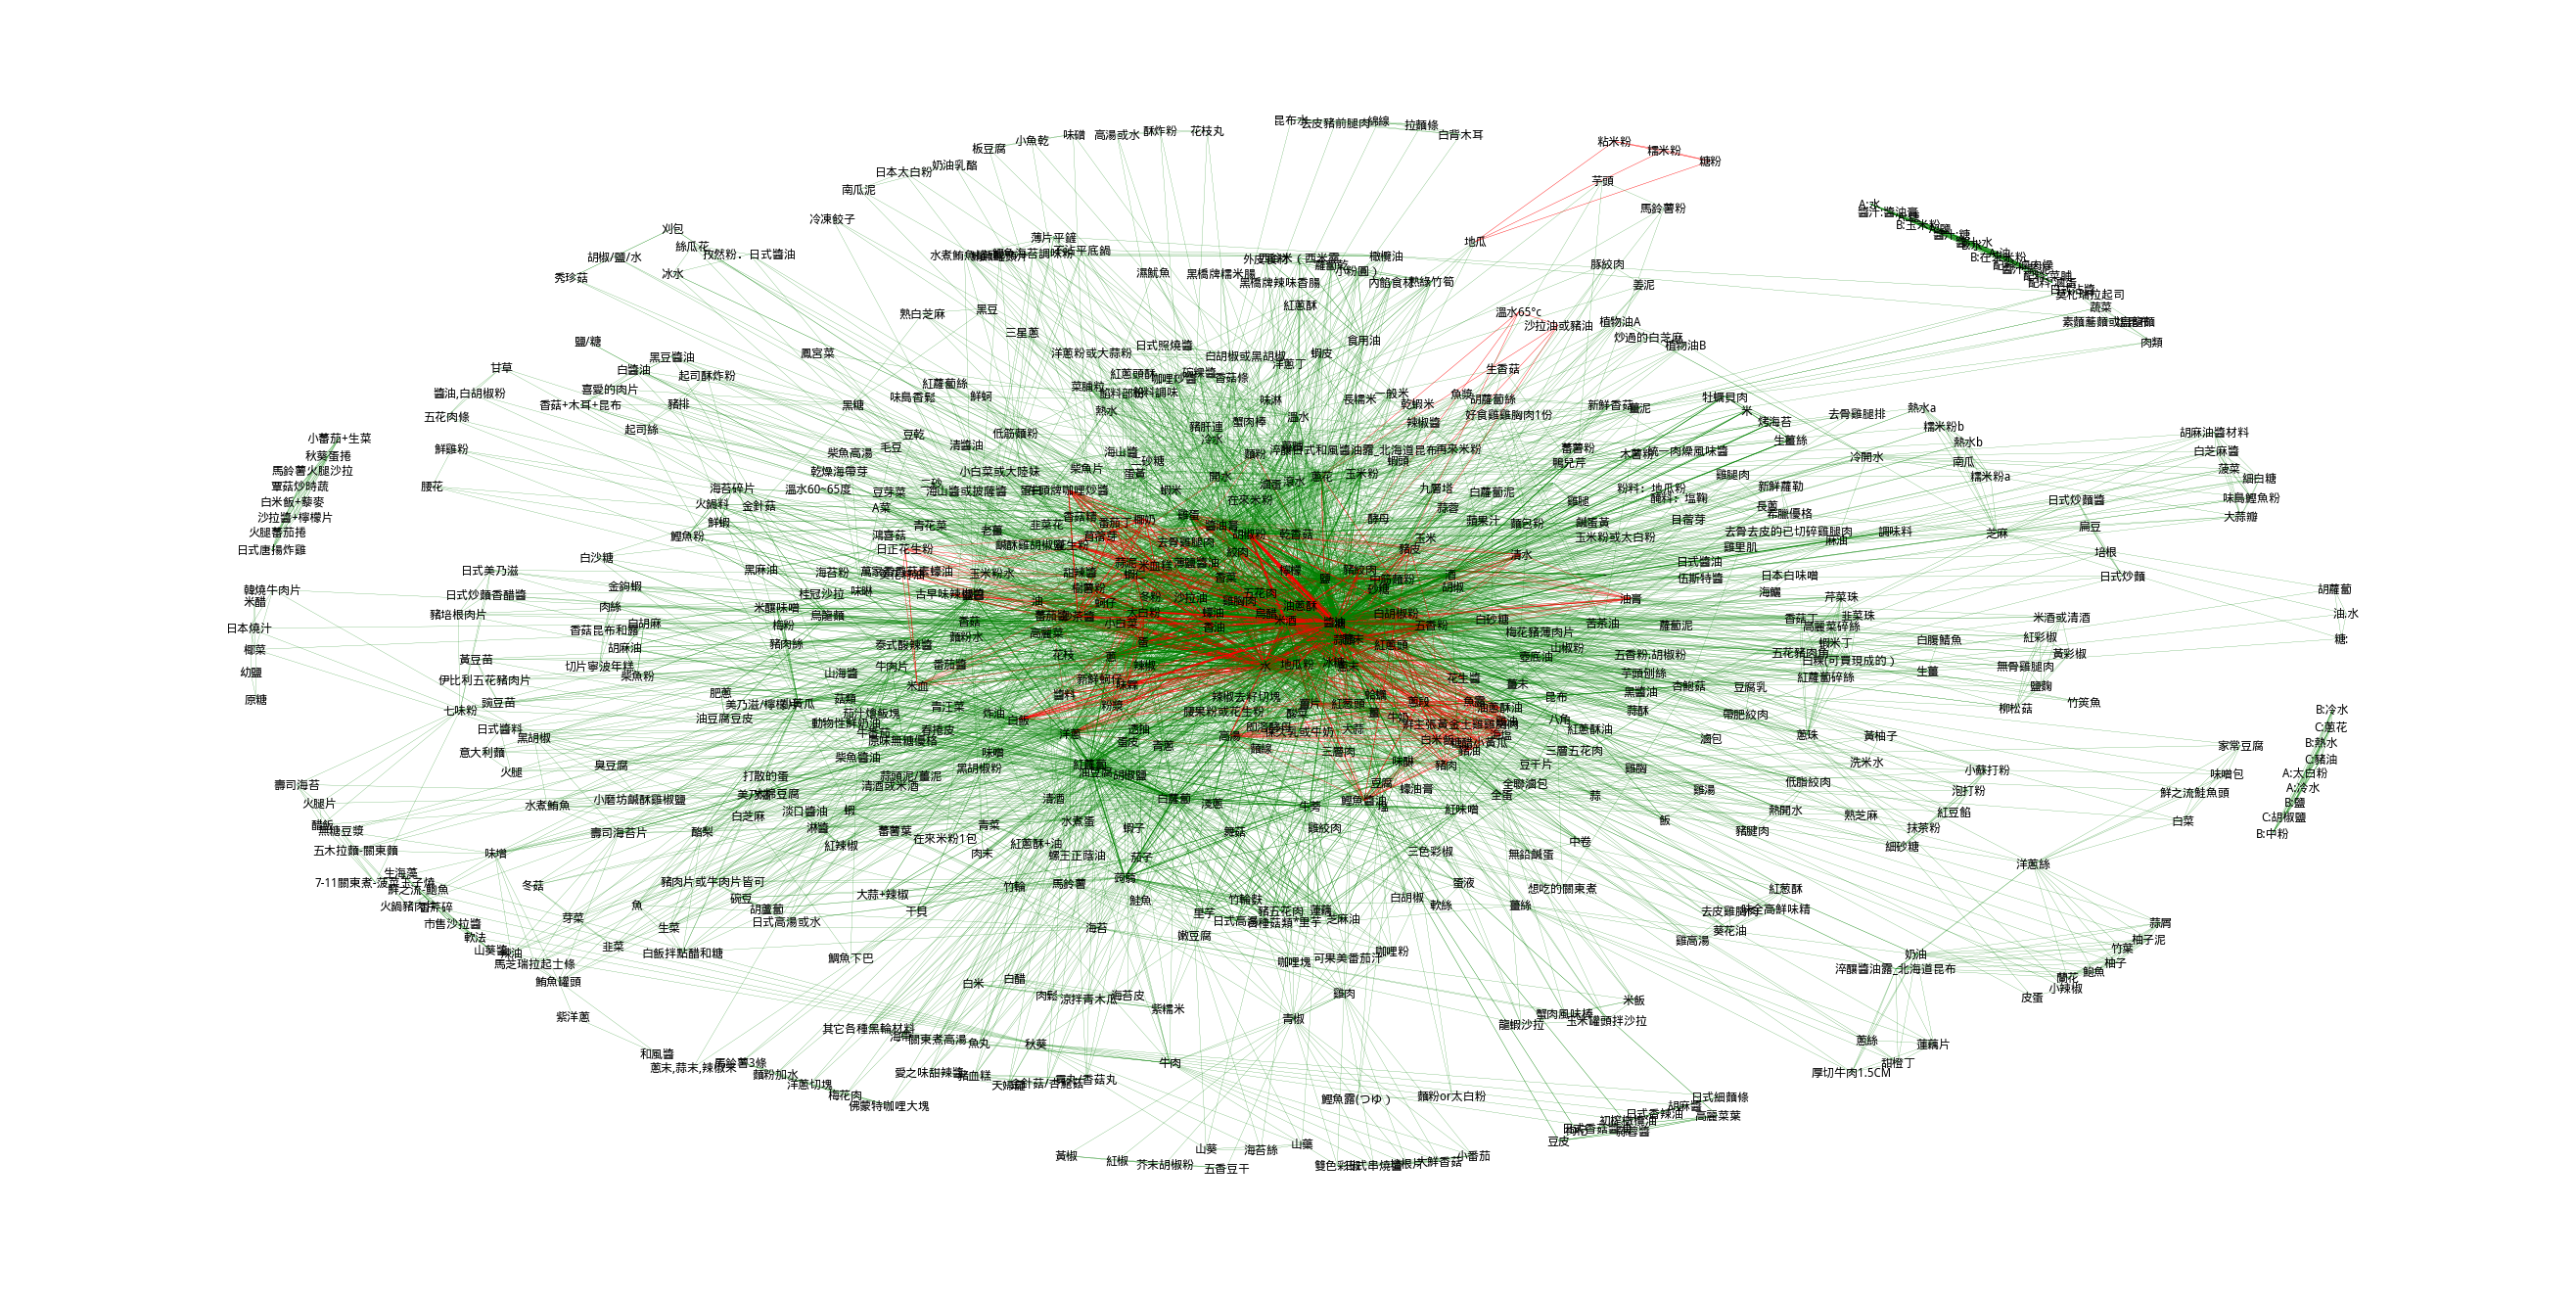

In [28]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
%matplotlib inline

WQY = fm.FontProperties(fname = "/usr/share/fonts/truetype/wqy/wqy-microhei.ttc")
nx.set_fontproperties(WQY)

default_weight = 0.2
G = nx.Graph()

BLUE = "#99CCFF"
GRAY = "#b3cccc"

for nodes in result[:609]:
    n0 = nodes[0]
    n1 = nodes[1]
    if G.has_edge(n0,n1):   
        G[n0][n1]['weight'] += default_weight
    else:
        G.add_edge(n0,n1, color = 'b', weight = default_weight)
        
for nodes in result[610:]:
    n0 = nodes[0]
    n1 = nodes[1]
    if nodes in result[:609]:
        G[n0][n1]['color'] = 'r'
        if G.has_edge(n0,n1):   
            G[n0][n1]['weight'] += default_weight
        else:
            G.add_edge(n0,n1, color = 'r', weight = default_weight)
    else:
        if G.has_edge(n0,n1):   
            G[n0][n1]['weight'] += default_weight
        else:
            G.add_edge(n0,n1, color = 'g', weight = default_weight)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, node_color = BLUE, with_labels = True, edge_color=colors, width=weights, node_size = 1)
fig = plt.gcf()
fig.set_size_inches(36, 18)
fig.savefig('joint_tw_jp.png', dpi=100)

In [15]:
import operator
from collections import Counter

sorted_dg = sorted(nx.degree(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree:',sorted_dg[:15])

print()

sorted_close = sorted(nx.closeness_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Closeness centrality:',sorted_close[:15])

print()

sorted_degree = sorted(nx.degree_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree centrality:',sorted_degree[:15])


Degree: [('醬油', 270), ('水', 212), ('鹽', 186), ('米酒', 183), ('糖', 146), ('胡椒粉', 134), ('洋蔥', 107), ('油蔥酥', 100), ('太白粉', 99), ('紅蘿蔔', 97), ('蒜頭', 95), ('雞蛋', 93), ('蛋', 92), ('白胡椒粉', 88), ('蔥', 85)]

Closeness centrality: [('醬油', 0.5983433342495386), ('水', 0.5620614671162161), ('鹽', 0.5452500573320821), ('米酒', 0.5404009955573896), ('糖', 0.5130260858387226), ('胡椒粉', 0.5111082313122227), ('洋蔥', 0.5054397481553404), ('油蔥酥', 0.49536757926094055), ('太白粉', 0.49447179701996224), ('蛋', 0.49313418169889833), ('紅蘿蔔', 0.49092083258893926), ('蒜頭', 0.48916440742761924), ('白胡椒粉', 0.486120717781403), ('冰糖', 0.486120717781403), ('蒜末', 0.4848278435319843)]

Degree centrality: [('醬油', 0.4404567699836868), ('水', 0.34584013050570966), ('鹽', 0.30342577487765093), ('米酒', 0.2985318107667211), ('糖', 0.23817292006525287), ('胡椒粉', 0.21859706362153344), ('洋蔥', 0.17455138662316477), ('油蔥酥', 0.1631321370309951), ('太白粉', 0.16150081566068517), ('紅蘿蔔', 0.15823817292006526), ('蒜頭', 0.15497553017944535), ('雞蛋', 0.151712

In [17]:
nd = G.number_of_nodes()
possible_edges = nd*(nd-1)/2

print('Total possible edges:',possible_edges)
print('Total edges in the graph:',G.number_of_edges())

density = round(nx.density(G),4)
print('Density:',density)
print()
print(nx.info(G))

Total possible edges: 188191.0
Total edges in the graph: 5106
Density: 0.0271

Name: 
Type: Graph
Number of nodes: 614
Number of edges: 5106
Average degree:  16.6319


In [22]:
import operator
from collections import Counter
myDict = Counter(result)
sorted_x = sorted(myDict.items(), key = operator.itemgetter(1), reverse = True)
print('Number of sorted unique pairs:', len(sorted_x))
print(sorted_x[:15])

Number of sorted unique pairs: 5451
[(('醬油', '米酒'), 22), (('太白粉', '水'), 19), (('醬油', '糖'), 17), (('米酒', '糖'), 14), (('水', '糖'), 13), (('水', '米酒'), 13), (('蛋', '水'), 12), (('水', '醬油'), 12), (('醬油', '水'), 12), (('水', '鹽'), 11), (('小白菜', '水'), 11), (('鹽', '醬油'), 11), (('蒜頭', '醬油'), 11), (('-', '-'), 10), (('蒜頭', '米酒'), 10)]


In [19]:
max_degree_item = max(nx.degree(G).items(),key=operator.itemgetter(1))
print(max_degree_item[1])

270


In [20]:
total = 0
for i,v in nx.degree(G).items():
    subv = max_degree_item[1] - v
    total += subv

dn = (nd-1)*(nd-2)
centr = total/dn
print('Group centrality:',round(centr,4))

Group centrality: 0.4147
